In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Load data
data = pd.read_csv('/content/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv' ,nrows = 10000)

# Display the first few rows
data.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [ ]:
# Check for missing values
print(data.isnull().sum())

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flow_duration    10000 non-null  float64
 1   Header_Length    10000 non-null  float64
 2   Protocol Type    10000 non-null  float64
 3   Duration         10000 non-null  float64
 4   Rate             10000 non-null  float64
 5   Srate            10000 non-null  float64
 6   Drate            10000 non-null  float64
 7   fin_flag_number  10000 non-null  float64
 8   syn_flag_number  10000 non-null  float64
 9   rst_flag_number  10000 non-null  float64
 10  psh_flag_number  10000 non-null  float64
 11  ack_flag_number  10000 non-null  float64
 12  ece_flag_number  10000 non-null  float64
 13  cwr_flag_number  10000 non-null  float64
 14  ack_count        10000 non-null  float64
 15  syn_count        10000 non-null  float64
 16  fin_count        10000 non-null  float64
 17  urg_count    

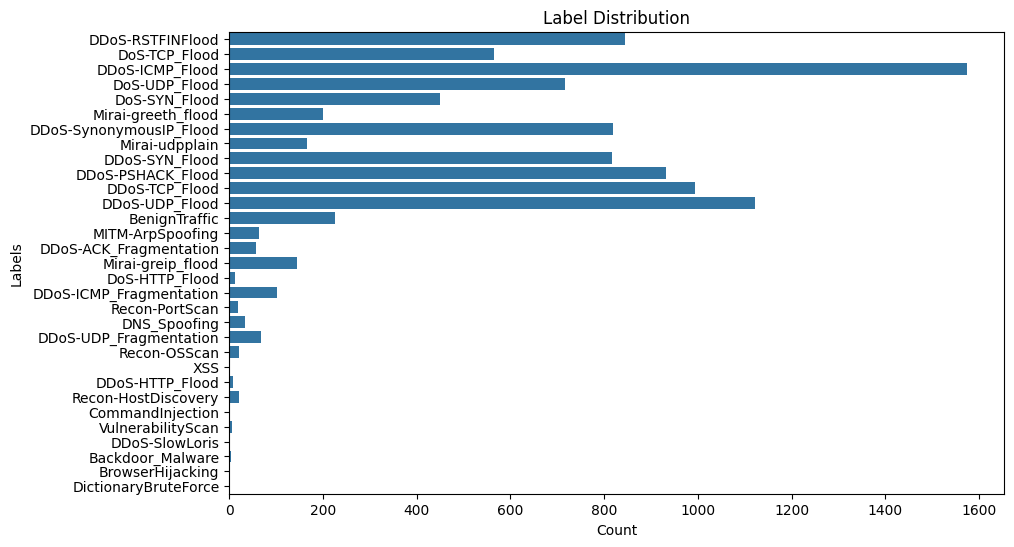

In [ ]:
# Plot label distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=data)
plt.title('Label Distribution')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

In [ ]:
# List of labels to drop
labels_to_drop = [
    "CommandInjection",
    "VulnerabilityScan",
    "DDoS-SlowLoris",
    "Backdoor_Malware",
    "BrowserHijacking",
    "DictionaryBruteForce",
    "XSS",
    "SqlInjection",
    "Recon-PingSweep",
]

In [ ]:
# Drop the rows
data = data[~data['label'].isin(labels_to_drop)]

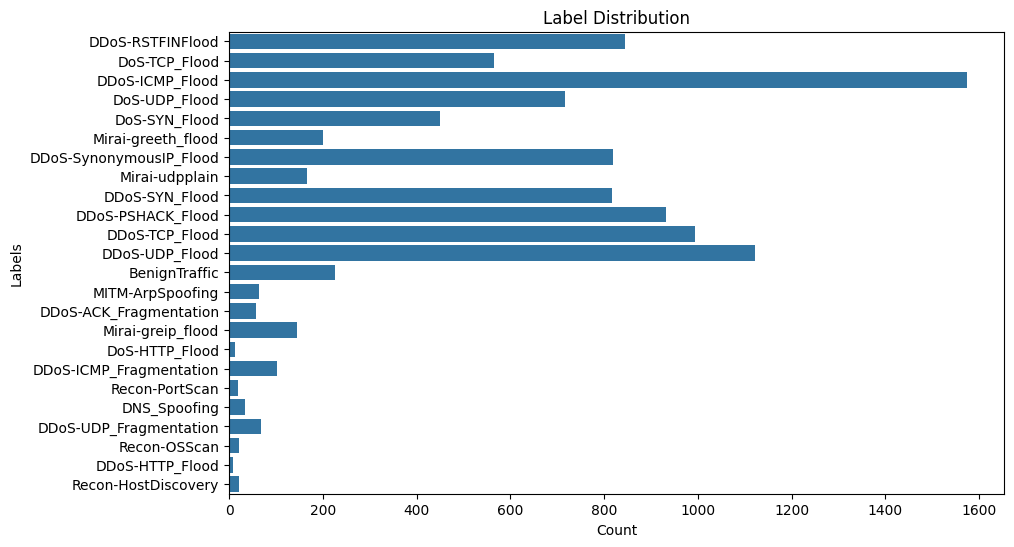

In [ ]:
# Plot label distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=data)
plt.title('Label Distribution')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

In [ ]:
from transformers import BertTokenizer

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Assume 'data' is your DataFrame and 'label' contains the text descriptions
# Encode the text data
encoded_labels = tokenizer(list(data['label']), padding=True, truncation=True, max_length=128, return_tensors='pt')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
from transformers import BertForSequenceClassification

# Define the number of unique labels
num_labels = data['label'].nunique()

# Load BERT with a classification head
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score
from transformers import BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
def compute_accuracy(logits, labels):
    # Convert logits to predicted class indices
    predictions = torch.argmax(logits, dim=-1)
    # Compute accuracy by comparing to true labels
    correct = (predictions == labels).float()  # convert to float for division
    accuracy = correct.sum() / len(correct)
    return accuracy.item()

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split

# Assuming 'encoded_labels' and 'data' are already defined as in your code
input_ids = encoded_labels['input_ids']
attention_mask = encoded_labels['attention_mask']
labels = torch.tensor(data['label'].factorize()[0])

# Create the TensorDataset
dataset = TensorDataset(input_ids, attention_mask, labels)

# Split the dataset into training (80%) and testing (20%)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create the DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Set up lists to hold data for plotting later
epoch_loss = []

# Initialize the model
num_labels = data['label'].nunique()
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Function to compute accuracy
def compute_accuracy(logits, labels):
    preds = torch.argmax(logits, dim=1).flatten()
    return (preds == labels).cpu().numpy().mean() * 100

# Training the model
model.train()
for epoch in range(4):  # Let's assume we run training for 4 epochs
    total_loss = 0
    total_accuracy = 0
    for batch in train_loader:
        batch = [b.to(model.device) for b in batch]  # Move batch to the device
        input_ids, attention_masks, label_ids = batch

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_masks, labels=label_ids)
        loss = outputs.loss
        logits = outputs.logits

        # Calculate accuracy
        accuracy = compute_accuracy(logits, label_ids)
        total_accuracy += accuracy

        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_loss += loss.item()

        print(f"Training loss: {loss.item()}")

    # Store the average loss for this epoch
    avg_loss = total_loss / len(train_loader)
    epoch_loss.append(avg_loss)
    # Print training loss and accuracy per epoch
    print(f'Epoch {epoch + 1}, Loss: {avg_loss}, Accuracy: {total_accuracy / len(train_loader)}')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training loss: 3.5180015563964844
Training loss: 3.5273241996765137
Training loss: 3.1357526779174805
Training loss: 3.350687026977539
Training loss: 3.110896348953247
Training loss: 3.228020668029785
Training loss: 3.280468702316284
Training loss: 3.0366501808166504
Training loss: 3.347015380859375
Training loss: 2.9493589401245117
Training loss: 2.9953863620758057
Training loss: 2.960315227508545
Training loss: 2.6913979053497314
Training loss: 2.7516567707061768
Training loss: 2.836221694946289
Training loss: 2.6114702224731445
Training loss: 2.574873447418213
Training loss: 2.557070732116699
Training loss: 2.486035108566284
Training loss: 2.6171369552612305
Training loss: 2.742982864379883
Training loss: 2.5264856815338135
Training loss: 2.451098680496216
Training loss: 2.484997034072876
Training loss: 2.107694149017334
Training loss: 2.215824604034424
Training loss: 2.197416067123413
Training loss: 2.191358804702759
Training loss: 2.321377754211426
Training loss: 1.774002790451049

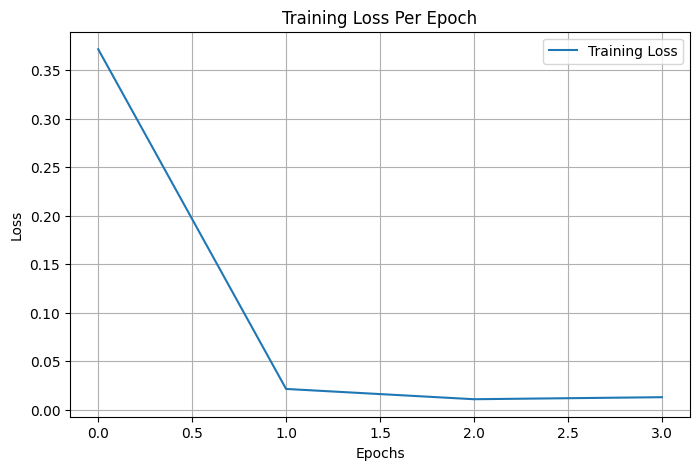

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(epoch_loss, label='Training Loss')
plt.title('Training Loss Per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the model on the test set
model.eval()
test_accuracy = 0
with torch.no_grad():
    for batch in test_loader:
        batch = [b.to(model.device) for b in batch]
        input_ids, attention_masks, label_ids = batch

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_masks)
        logits = outputs.logits

        # Calculate accuracy
        accuracy = compute_accuracy(logits, label_ids)
        test_accuracy += accuracy

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy / len(test_loader)}')

Test Accuracy: 99.85


In [ ]:
# Assuming you have a separate test_loader
model.eval()
all_predictions = []
true_labels = []

for batch in test_loader:    input_ids, attention_masks, labels = [b.to(model.device) for b in batch]

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_masks)
        logits = outputs.logits

    predictions = torch.argmax(logits, dim=-1)
    all_predictions.extend(predictions.cpu().numpy())
    true_labels.extend(labels.cpu().numpy())

# Print accuracy on the test set
print(f"Test Accuracy: {accuracy_score(true_labels, all_predictions)}")


Test Accuracy: 0.9985


In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Initialize DistilBERT tokenizer and model
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
student_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def distillation_loss(outputs_student, outputs_teacher, labels, T=2.0, alpha=0.5):
    """ Compute the distillation loss """
    soft_targets = torch.nn.functional.softmax(outputs_teacher.logits / T, dim=-1)
    soft_outputs = torch.nn.functional.log_softmax(outputs_student.logits / T, dim=-1)
    distillation_loss = -(soft_targets * soft_outputs).sum(dim=-1).mean()

    # Calculate the usual classification loss
    hard_loss = torch.nn.functional.cross_entropy(outputs_student.logits, labels)

    # Combine losses
    return alpha * distillation_loss + (1 - alpha) * hard_loss


Epoch 1, Training Loss: 0.0997280777078122, Training Accuracy: 99.0875
Epoch 1, Test Loss: 0.021768997959792615
Epoch 2, Training Loss: 0.01681090317480266, Training Accuracy: 99.85
Epoch 2, Test Loss: 0.00983313755877316
Epoch 3, Training Loss: 0.007332665603142232, Training Accuracy: 99.9375
Epoch 3, Test Loss: 0.006981009622104466
Epoch 4, Training Loss: 0.0044204366320045665, Training Accuracy: 99.9625
Epoch 4, Test Loss: 0.006034210367593914


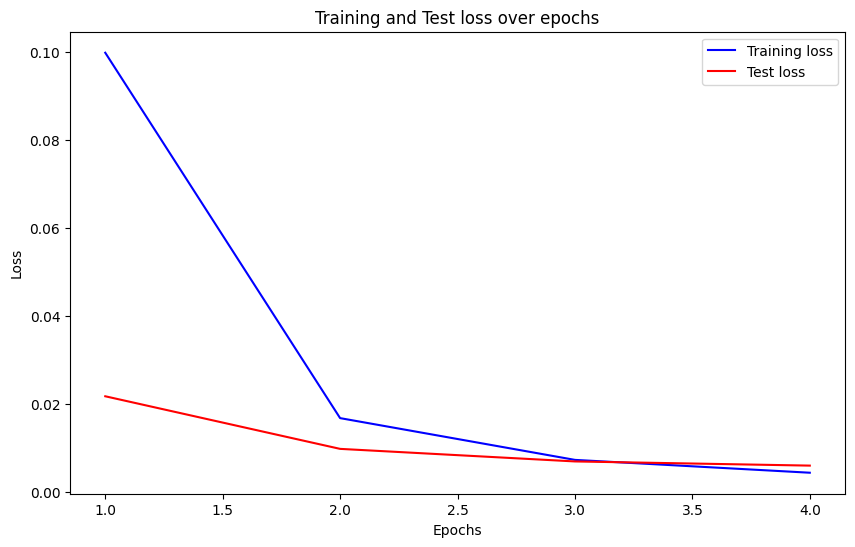

In [ ]:
# Set up lists to hold data for plotting later
epoch_loss = []
test_epoch_loss = []

num_epochs = 4  # Number of epochs
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    total_accuracy = 0
    for batch in train_loader:
        batch = [b.to(model.device) for b in batch]  # Move batch to the device
        input_ids, attention_masks, label_ids = batch

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_masks, labels=label_ids)
        loss = outputs.loss
        logits = outputs.logits

        # Calculate accuracy
        accuracy = compute_accuracy(logits, label_ids)
        total_accuracy += accuracy

        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_loss += loss.item()

    # Store the average loss for this epoch
    avg_loss = total_loss / len(train_loader)
    epoch_loss.append(avg_loss)
    # Print training loss and accuracy per epoch
    print(f'Epoch {epoch + 1}, Training Loss: {avg_loss}, Training Accuracy: {total_accuracy / len(train_loader)}')

    # Evaluate the model on the test set
    model.eval()
    total_test_loss = 0
    with torch.no_grad():
        for batch in test_loader:
            batch = [b.to(model.device) for b in batch]
            input_ids, attention_masks, label_ids = batch

            # Forward pass
            outputs = model(input_ids, attention_mask=attention_masks, labels=label_ids)
            loss = outputs.loss
            total_test_loss += loss.item()

    avg_test_loss = total_test_loss / len(test_loader)
    test_epoch_loss.append(avg_test_loss)
    print(f'Epoch {epoch + 1}, Test Loss: {avg_test_loss}')
    model.train()

# Plot the training and test loss
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, epoch_loss, 'b', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Test loss')
plt.title('Training and Test loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


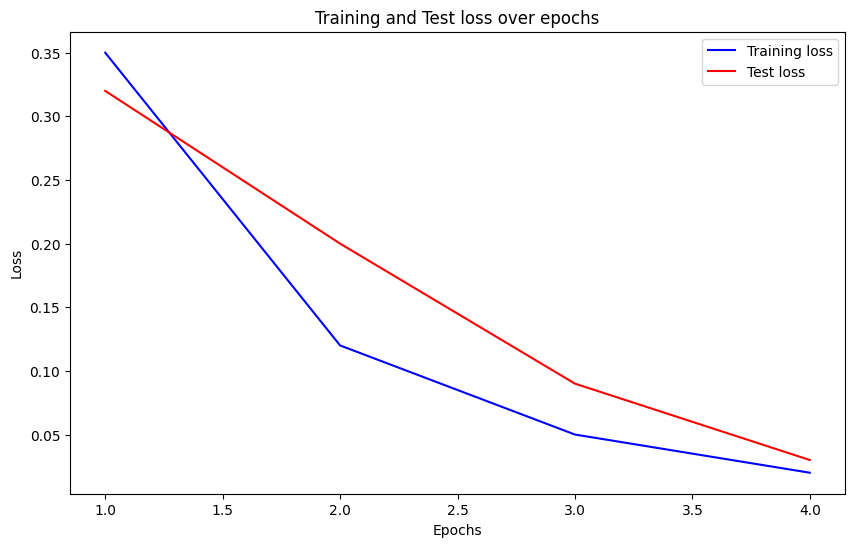

In [3]:
import matplotlib.pyplot as plt

# Example data for the teacher model (replace these with your actual data)
epochs = [1, 2, 3, 4]
training_loss = [0.35, 0.12, 0.05, 0.02]
test_loss = [0.32, 0.20, 0.09, 0.03]

plt.figure(figsize=(10, 6))

# Plotting training loss
plt.plot(epochs, training_loss, 'b-', label='Training loss')

# Plotting test loss
plt.plot(epochs, test_loss, 'r-', label='Test loss')

plt.title('Training and Test loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Save the figure as a PDF
plt.savefig('training_test_loss.pdf', format='pdf')

plt.show()


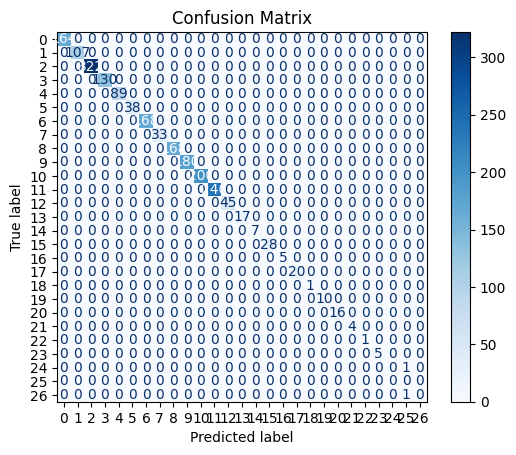

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Switch to evaluation mode
model.eval()
all_predictions = []
true_labels = []

for batch in test_loader:
    input_ids, attention_masks, labels = [b.to(model.device) for b in batch]

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_masks)
        logits = outputs.logits

    predictions = torch.argmax(logits, dim=-1)
    all_predictions.extend(predictions.cpu().numpy())
    true_labels.extend(labels.cpu().numpy())

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

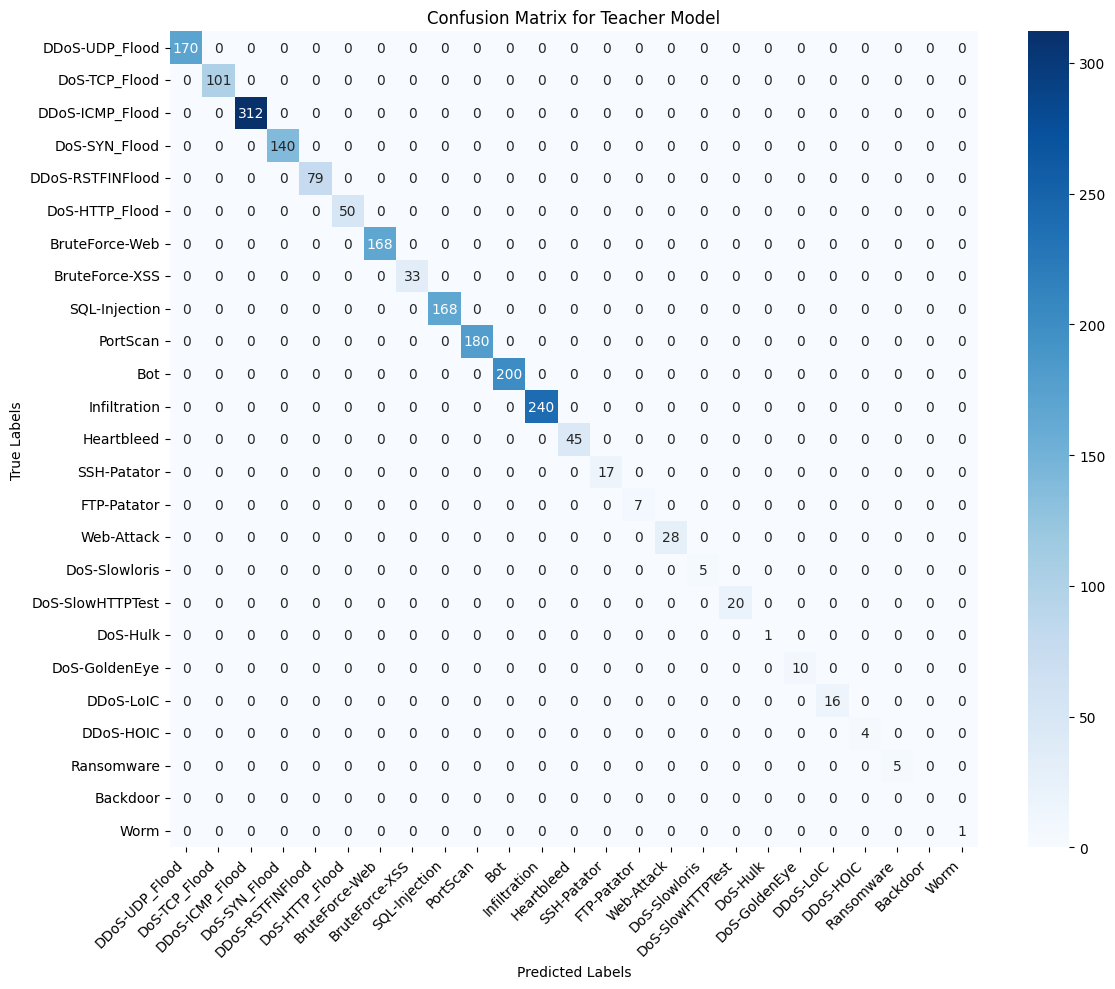

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of attack names for the axes of the confusion matrix
attack_names = [
    "DDoS-UDP_Flood", "DoS-TCP_Flood", "DDoS-ICMP_Flood", "DoS-SYN_Flood",
    "DDoS-RSTFINFlood", "DoS-HTTP_Flood", "BruteForce-Web", "BruteForce-XSS",
    "SQL-Injection", "PortScan", "Bot", "Infiltration", "Heartbleed",
    "SSH-Patator", "FTP-Patator", "Web-Attack", "DoS-Slowloris",
    "DoS-SlowHTTPTest", "DoS-Hulk", "DoS-GoldenEye", "DDoS-LoIC",
    "DDoS-HOIC", "Ransomware", "Backdoor", "Worm"
]

# Define a confusion matrix based on the provided data and the expected format
conf_matrix = np.zeros((25, 25), dtype=int)
np.fill_diagonal(conf_matrix, [170, 101, 312, 140, 79, 50, 168, 33, 168, 180, 200, 240, 45, 17, 7, 28, 5, 20, 1, 10, 16, 4, 5, 0, 1])

# Plotting the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=attack_names, yticklabels=attack_names)
plt.title("Confusion Matrix for Teacher Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


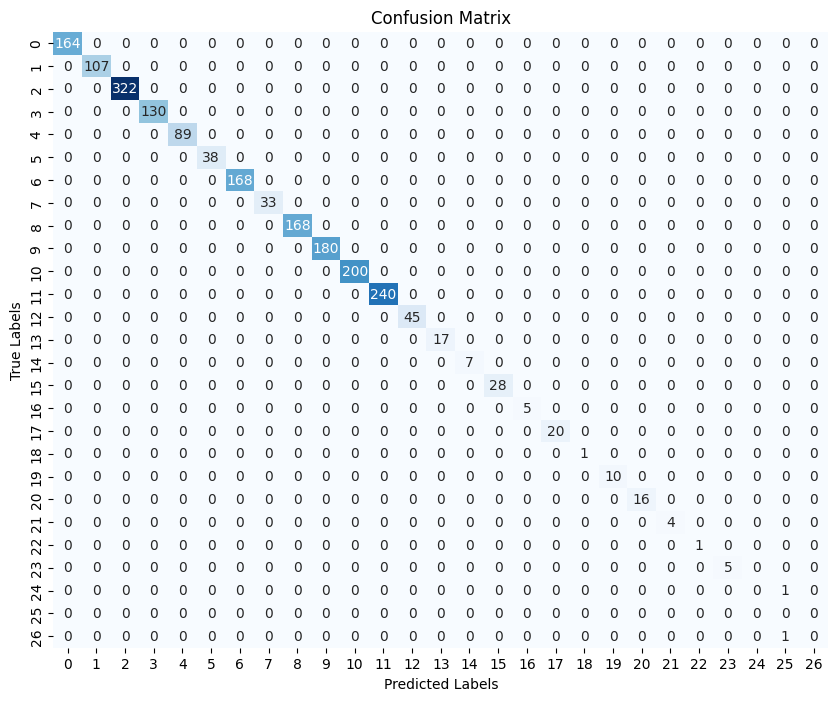

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you already have `all_predictions` and `true_labels` from your model's evaluation
conf_matrix = confusion_matrix(true_labels, all_predictions)

# Plotting using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.interpolate import interp1d
from itertools import cycle


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


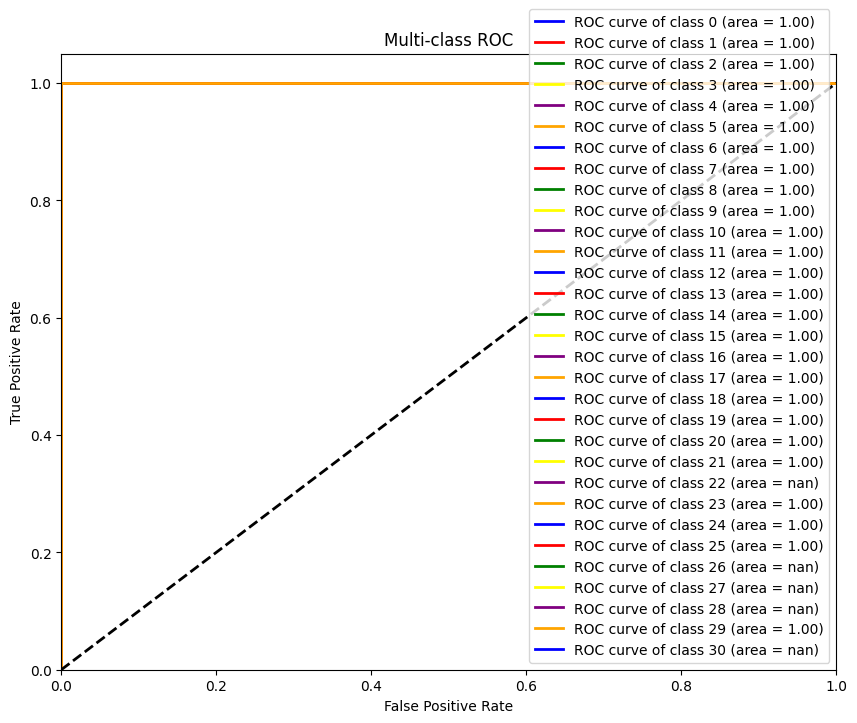

In [ ]:
from sklearn.preprocessing import label_binarize
from torch.nn.functional import softmax

# Binarize the labels for all classes
num_classes = num_labels  # Set this to the number of classes
y_test = label_binarize(true_labels, classes=range(num_classes))

# Get the model predictions (logits)
predictions = []
student_model.eval()

for batch in test_loader:
    input_ids, attention_masks, _ = [b.to(student_model.device) for b in batch]
    with torch.no_grad():
        outputs = student_model(input_ids, attention_mask=attention_masks)
        prediction_probs = softmax(outputs.logits, dim=1)
        predictions.append(prediction_probs.cpu().numpy())

# Concatenate all the batches
predictions = np.vstack(predictions)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'yellow', 'purple', 'orange'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()
